<a href="https://colab.research.google.com/github/RVidhathri/Handwritten-Digit-Recognition/blob/main/Handwritten_Digit_Classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
pip install tensorflow

In [31]:
#Libraries
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np


In [40]:
#MNIST dataset import
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
print("Training set:",x_train.shape,y_train.shape)
print("Testing set:",x_test.shape,y_test.shape)

Training set: (60000, 28, 28) (60000,)
Testing set: (10000, 28, 28) (10000,)


In [33]:
#normalize pixel values 0-233->0-1
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

#reshape to add channel dimension to [28,28,1]
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)

#convert labels to one-hot encoding
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [34]:
model=models.Sequential()

#Convolution layer 1
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))

#Convolution layer 2
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

#Flattening for dense layers
model.add(layers.Flatten())

#Fully Connected Layer
model.add(layers.Dense(128,activation='relu'))

#output layer
model.add(layers.Dense(10,activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
#model compilation
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [36]:
##train model
history=model.fit(x_train,y_train,batch_size=64,epochs=5,validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 49s 55ms/step - accuracy: 0.8869 - loss: 0.3927 - val_accuracy: 0.9843 - val_loss: 0.0502
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 56ms/step - accuracy: 0.9839 - loss: 0.0520 - val_accuracy: 0.9900 - val_loss: 0.0371
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 76s 50ms/step - accuracy: 0.9891 - loss: 0.0341 - val_accuracy: 0.9903 - val_loss: 0.0374
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 51ms/step - accuracy: 0.9927 - loss: 0.0249 - val_accuracy: 0.9887 - val_loss: 0.0370
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.9940 - loss: 0.0191 - val_accuracy: 0.9905 - val_loss: 0.0357


In [37]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f"Accuarcy:{test_acc*100:2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9885 - loss: 0.0395
Accuarcy:99.049997%


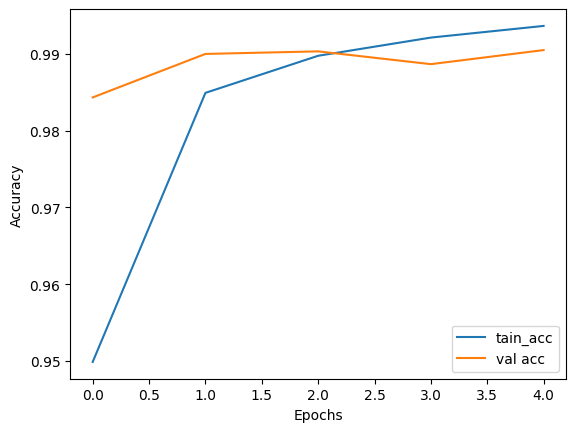

In [38]:
plt.plot(history.history['accuracy'],label='tain_acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

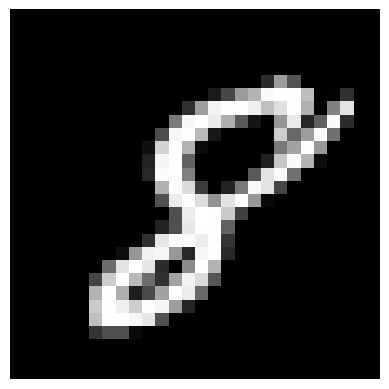

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Predicted Digit: 8


In [39]:
#testing with random image

index = np.random.randint(0, len(x_test))
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()

# Predict
pred = model.predict(x_test[index].reshape(1, 28, 28, 1))
print("Predicted Digit:", np.argmax(pred))
